<a href="https://colab.research.google.com/github/cobydodson/python2/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
EDA Poject
Group 11
Ashna Patel, Coby Dodson, Jon Hellner

Questions to Answer:
1. How does air pollution correlate with lung cancer rates across different states?
2. How do smoking rates compare to air pollution levels in contributing to lung cancer incidence?
3. Are there significant differences in lung cancer rates in regions with high pollution versus high smoking rates?
4. Does smoking amplify the effect of air pollution on lung cancer risk?

Conclusions:
In our analyses, we found that the most significant impact on lung cancer rates was smoking. We saw a strong, positive correlation with increases in smoking
resulting in an increase in lung cancer rates. While not as significant of an effect, we did see a positive (but weak) correlation with increases in Air Quality Index
resulting in an increase in lung cancer rates.

'''


'\nEDA Poject\nGroup 11\nAshna Patel, Coby Dodson, Jon Hellner\n\nQuestions to Answer:\n1. How does air pollution correlate with lung cancer rates across different states?\n2. How do smoking rates compare to air pollution levels in contributing to lung cancer incidence?\n3. Are there significant differences in lung cancer rates in regions with high pollution versus high smoking rates?\n4. Does smoking amplify the effect of air pollution on lung cancer risk?\n\nConclusions:\nIn our analyses, we found that the most significant impact on lung cancer rates was smoking. We saw a strong, positive correlation with increases in smoking\nresulting in an increase in lung cancer rates. While not as significant of an effect, we did see a positive (but weak) correlation with increases in Air Quality Index\nresulting in an increase in lung cancer rates.\n\n'

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
#read in lung cancer data
lung_cancer_df = pd.read_csv('lung_cancer_states.csv', header=4)

In [ ]:
#only keep relevant rows
lung_cancer_df = lung_cancer_df.iloc[:53]
#format non numeric values to Nan
lung_cancer_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'] = pd.to_numeric(lung_cancer_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'], errors='coerce')
#fill missing state with mean cases
lung_cancer_df = lung_cancer_df.fillna(lung_cancer_df['Age-Adjusted Incidence Rate([rate note]) - cases per 100,000'].mean())
#only keep state and cases per 100,000
lung_cancer_clean = lung_cancer_df[['State', 'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000']]
#reformat the state names
lung_cancer_clean['State'] = lung_cancer_clean['State'].str[:-3]
#drop first row (US average)
lung_cancer_clean = lung_cancer_clean.drop(index=lung_cancer_clean.index[0])
#rename column
lung_cancer_clean = lung_cancer_clean.rename(columns={'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000': 'Cases per 100,000'})
#round to two decimal places
lung_cancer_clean['Cases per 100,000'] = lung_cancer_clean['Cases per 100,000'].round(2)

lung_cancer_clean


<ipython-input-179-0996746a1dcb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_cancer_clean['State'] = lung_cancer_clean['State'].str[:-3]


,State,"Cases per 100,000"
1,Kentucky,84.50
2,West Virginia,76.10
3,Mississippi,68.90
4,Arkansas,68.20
5,Tennessee,68.10
6,Missouri,67.30
7,Maine,67.30
8,Ohio,64.30
9,Oklahoma,63.30
10,North Carolina,62.60


In [ ]:
#Iterates over all of the csv files into a list
files = [f"annual_aqi_by_county_{year}.csv" for year in range(2017, 2020)]

#Create a list to insert dataframes into
dataframes = []

#Iterate over the files to turn them into dataframes
for file in files:
    df = pd.read_csv(file)
    dataframes.append(df)

#Concatenate the dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

#Drop NaN values
combined_df = combined_df.dropna()
combined_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2017,270,224,45,1,0,0,0,108,56,39,0,0,188,82,0
1,Alabama,Clay,2017,118,76,42,0,0,0,0,69,57,40,0,0,0,118,0
2,Alabama,Colbert,2017,283,244,39,0,0,0,0,67,53,39,0,0,202,81,0
3,Alabama,DeKalb,2017,359,305,54,0,0,0,0,80,54,40,0,0,290,69,0
4,Alabama,Elmore,2017,226,221,5,0,0,0,0,58,45,35,0,0,226,0,0


In [ ]:
#Simplify dataframe to later combine with other data
aqidf = combined_df[["State", "County", "Year", "Max AQI", "90th Percentile AQI", "Median AQI", "Hazardous Days"]]
aqidf.head()

,State,County,Year,Max AQI,90th Percentile AQI,Median AQI,Hazardous Days
0,Alabama,Baldwin,2017,108,56,39,0
1,Alabama,Clay,2017,69,57,40,0
2,Alabama,Colbert,2017,67,53,39,0
3,Alabama,DeKalb,2017,80,54,40,0
4,Alabama,Elmore,2017,58,45,35,0


In [ ]:
#This new dataframe contains the average median AQI by state
avg_median_aqi = aqidf.groupby('State')['Median AQI'].mean().reset_index()
avg_median_aqi.rename(columns={'Median AQI': 'Average Median AQI'}, inplace=True)

#This new dataframe contains the average maximum AQI by state
avg_max_aqi = aqidf.groupby('State')['Max AQI'].mean().reset_index()
avg_max_aqi.rename(columns={'Max AQI': 'Average Max AQI'}, inplace=True)

#This new dataframe contains the average 90th Percentile AQI by state
avg_90th_aqi = aqidf.groupby('State')['90th Percentile AQI'].mean().reset_index()
avg_90th_aqi.rename(columns={'90th Percentile AQI': 'Average 90th Percentile AQI'}, inplace=True)

#Merge all of the dataframes on state
avg_aqi = pd.merge(avg_median_aqi, avg_max_aqi, on='State')
avg_aqi = pd.merge(avg_aqi, avg_90th_aqi, on='State')

#Remove all the states that do not match with the other data sets
states_to_remove = ['Country Of Mexico', 'Virgin Islands']
avg_aqi = avg_aqi[avg_aqi['State'].isin(states_to_remove) == False]

#Replace the capitalization of DC to match other data sets
avg_aqi['State'] = avg_aqi['State'].replace('District Of Columbia', 'District of Columbia')

In [ ]:
#Convert the new data frames into csv
aqidf.to_csv('aqi_data.csv', index=False)
avg_aqi.to_csv('average_aqi.csv', index=False)

In [ ]:
tobacco = pd.read_csv('Tobacco_Use.csv')

#Drop unecessary columns to make dataset easier to read
tobacco.drop(['StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID', 'DisplayOrder',
              'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId', 'DataSource'], axis=1, inplace=True)
#Additional column filtering to keep relevant data
tobacco = tobacco[['YEAR', 'LocationDesc', 'TopicType', 'TopicDesc', 'MeasureDesc', 'Response','Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
        'Sample_Size', 'Gender', 'Race', 'Age', 'Education']]
#Removing unwanted data values such as years
#Keeping only generalized data, i.e. taking out survey results where there was only one gender/race
#Keeping only survey results from Current Smokers
#Removing other types of tobacco use (i.e. methods that don't have a smoking component)
#Removing U.S. states/territories that are not represented in other data sets
tobacco = tobacco[~tobacco['YEAR'].str.contains('-')]
tobacco = tobacco[tobacco['Race'] == 'All Races']
tobacco = tobacco[tobacco['Gender'] == 'Overall']
tobacco = tobacco[tobacco['YEAR'].isin(['2017', '2018', '2019'])]
tobacco = tobacco[tobacco['MeasureDesc'].isin(['Current Use', 'Current Smoking'])]
tobacco = tobacco[tobacco['TopicDesc'] != 'Smokeless Tobacco Use (Adults)']
tobacco = tobacco[tobacco['LocationDesc'] != 'Guam']

#Renaming columns for better comprehension
tobacco.rename(columns={'LocationDesc': 'State'}, inplace=True)
tobacco.rename(columns={'Data_Value':'% Smokers'}, inplace=True)

#Determining average smoking use by each state
avg_tobacco = tobacco.groupby('State')['% Smokers'].mean().reset_index()

#Determining averages of different types of smoking by state
diff_smoking = tobacco.groupby(['State','TopicDesc'])['% Smokers'].mean().reset_index()

In [ ]:
smega_table = lung_cancer_clean.merge(avg_aqi , on= 'State')

mega_table = smega_table.merge(avg_tobacco, on='State')
mega_table = mega_table.sort_values(by=['State']).reset_index()

In [ ]:
import folium
import json
import requests

#create a heat map to show 3 different variables (lung cancer rates, % smokers, average median AQI) by state
#download map data
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
geojson_data = requests.get(url).json()

us_bounds = [[24.396308, -125.0], [49.384358, -66.93457]]

# Make map centered on the U.S.
m = folium.Map(location=[37.8, -96], zoom_start=4)  # Coordinates for the U.S.

# Add layer for lung cancer rates
folium.Choropleth(
    geo_data=geojson_data,
    name='Lung Cancer Cases per 100,000',
    data=mega_table,
    columns=['State', 'Cases per 100,000'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Cases per 100,000',
).add_to(m)

# Add layer for % Smokers
choropleth_smokers = folium.Choropleth(
    geo_data=geojson_data,
    name='% Smokers',
    data=mega_table,
    columns=['State', '% Smokers'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='% Smokers',
).add_to(m)

# Add layer for Avg Median AQI
choropleth_AQI = folium.Choropleth(
    geo_data=geojson_data,
    name='Average Median AQI',
    data=mega_table,
    columns=['State', 'Average Median AQI'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Median AQI',
).add_to(m)

folium.LayerControl().add_to(m)

title_html = '''
     <h3 align="center" style="font-size:20px"><b>Interactive Map Showing Lung Cancer Rates, Smoking Rates, and Air Quality by State</b></h3>
     '''

m.get_root().html.add_child(folium.Element(title_html))
m.fit_bounds(us_bounds)
# Display the map
m

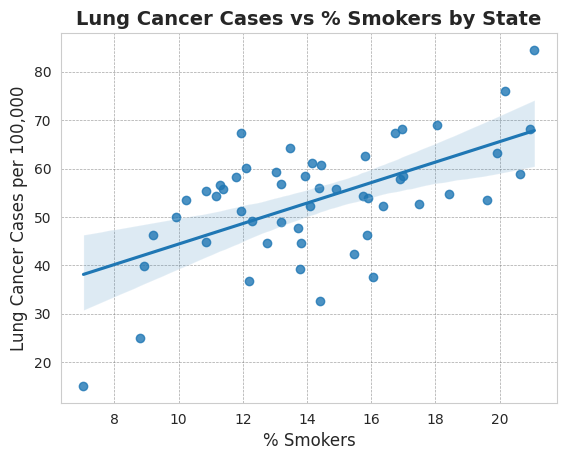

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Determine the correlation between lung cancer cases and percentage smokers per state
sns.regplot(data=mega_table, x="% Smokers", y="Cases per 100,000")
plt.title("Lung Cancer Cases vs % Smokers by State", fontsize=14, weight='bold')
plt.xlabel("% Smokers", fontsize=12)
plt.ylabel("Lung Cancer Cases per 100,000", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

There is a positive correlation. As the percentage of smokers increases, the number of lung cancer cases per 100,000 also tends to increase. This aligns with the known association between smoking and lung cancer. The data points are more closely clustered compared to the AQI graph, suggesting a stronger correlation between smoking and lung cancer cases.



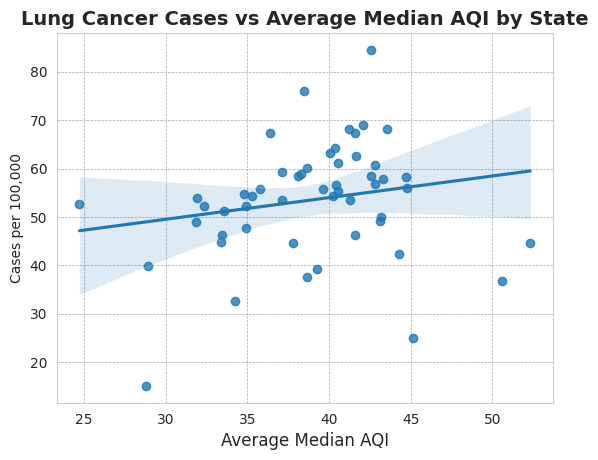

In [ ]:
#Determine the correlation between lung cancer and aqi
sns.regplot(data=mega_table, x="Average Median AQI", y="Cases per 100,000")
plt.title("Lung Cancer Cases vs Average Median AQI by State", fontsize=14, weight='bold')
plt.xlabel("Average Median AQI", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

There is a weak positive correlation. As the average median AQI increases, the number of lung cancer cases per 100,000 also tends to increase. This might indicate that higher air pollution levels (indicated by AQI) are associated with more lung cancer cases. The points are somewhat scattered, indicating variability in the data. This suggests that while AQI might influence lung cancer rates, other factors could also play significant roles. There are a few outliers in the data when it comes to both lung cancer cases and AQI. The relationship between AQi and lung cancer cases appears to be weaker than that between smoking and lung cancer,

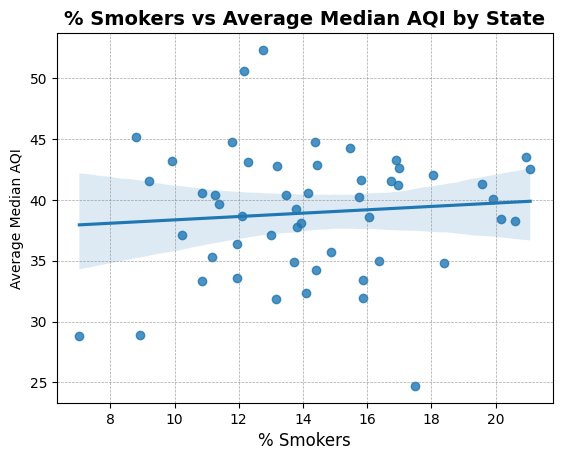

In [ ]:
#Determine the correlation between smoking and aqi
sns.reset_defaults()
sns.regplot(data=mega_table, x="% Smokers", y="Average Median AQI")
plt.title("% Smokers vs Average Median AQI by State", fontsize=14, weight='bold')
plt.xlabel("% Smokers", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

The trend line is almost horizontal, suggesting a very weak or negligible linear correlation between the two variables. There is no clear increase or decrease in AQI as % of smokers rises. From this correlation analysis, we can infer that the percentage of smokers in a state has little to no statistical relationship with the state’s average median AQI. External factors likely dominate AQI variability, and smoking is not a primary contributor to changes in air quality at this scale

<ipython-input-190-aeebf9bb3dc6>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(mega_table["State"], rotation=90, fontsize=8)


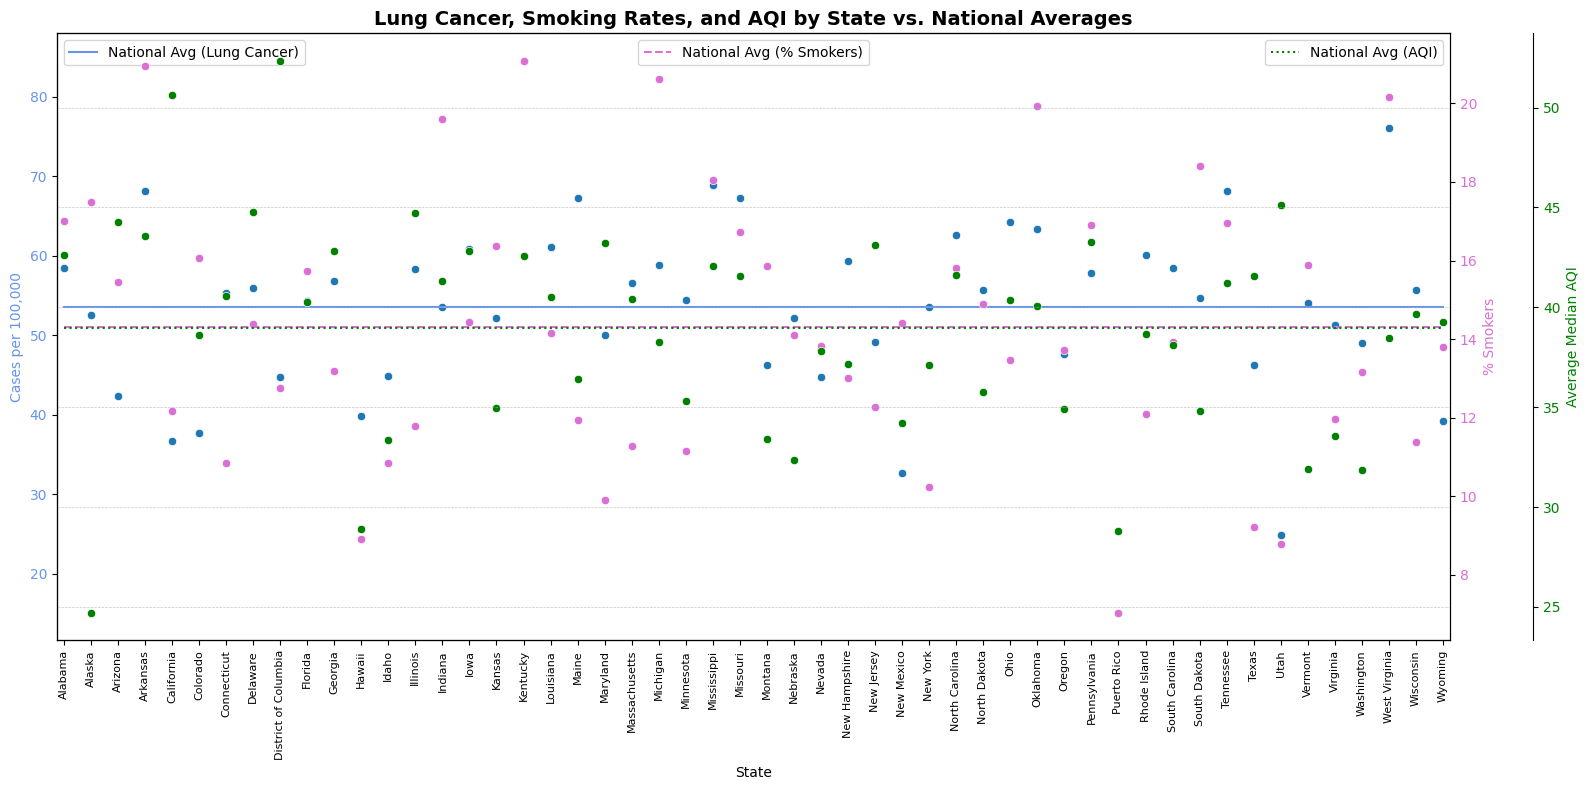

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# Graph 1: Lung Cancer Cases
lung_national = lung_cancer_clean['Cases per 100,000'].mean()
sns.lineplot(data=mega_table, x="State", y=lung_national, color='cornflowerblue', label='National Avg (Lung Cancer)', ax=ax1)
sns.scatterplot(data=mega_table, x="State", y="Cases per 100,000", ax=ax1)
ax1.set_ylabel("Cases per 100,000", color='cornflowerblue')
ax1.tick_params(axis='y', labelcolor='cornflowerblue')

# Graph 2: % Smokers
ax2 = ax1.twinx()  # Secondary y-axis for smokers
smoking_national = avg_tobacco['% Smokers'].mean()
sns.lineplot(data=mega_table, x="State", y=smoking_national, color='orchid', linestyle='--', label='National Avg (% Smokers)', ax=ax2)
sns.scatterplot(data=mega_table, x="State", y="% Smokers", color='orchid', ax=ax2)
ax2.set_ylabel("% Smokers", color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')

# Graph 3: AQI
ax3 = ax1.twinx()  # Tertiary y-axis for AQI
ax3.spines["right"].set_position(("outward", 60))  # Offset the third y-axis
aqi_national = mega_table['Average Median AQI'].mean()
sns.lineplot(data=mega_table, x="State", y=aqi_national, color='green', linestyle=':', label='National Avg (AQI)', ax=ax3)
sns.scatterplot(data=mega_table, x="State", y="Average Median AQI", color='green', ax=ax3)
ax3.set_ylabel("Average Median AQI", color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Common Features
ax1.set_title("Lung Cancer, Smoking Rates, and AQI by State vs. National Averages", fontsize=14, weight='bold')
ax1.set_xlabel("State")
ax1.set_xticklabels(mega_table["State"], rotation=90, fontsize=8)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
ax1.margins(x=0.005)  # Removes the extra margin on the x-axis

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper center")
ax3.legend(loc="upper right")

plt.tight_layout()
plt.show()

Lung Cancer vs Smoking:

Some states with high smoking rates (e.g., Kentucky, West Virginia) also have elevated lung cancer rates, aligning with expectations.
However, there are exceptions where high smoking rates don't correspond to higher lung cancer rates, suggesting other factors at play (e.g., healthcare access, environmental risks).

Lung Cancer vs AQI:

States with poor air quality (higher AQI, such as California) don't always exhibit high lung cancer rates, indicating that AQI may not strongly correlate with lung cancer in this dataset.

Smoking vs AQI:

No clear relationship between smoking rates and AQI. States with higher smoking rates don't consistently have worse air quality, further supporting earlier findings